# 1. Import packages

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.8.2


# 2. Download file

If you cannot download file correctly, you can directly download file here : https://drive.google.com/file/d/1GuTgP9b462jWqfdx4AntFjhhinpxxcYW/view?usp=sharing

In [ ]:
!gdown 1GuTgP9b462jWqfdx4AntFjhhinpxxcYW

Downloading...
From: https://drive.google.com/uc?id=1GuTgP9b462jWqfdx4AntFjhhinpxxcYW
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 80.8MB/s]


# 3. Load file

* Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

* Data Set Information:

  The dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult: https://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

  These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


* Attribute Information:
  For more information, read [Cortez et al., 2009].
  * Input variables (based on physicochemical tests):
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
  * Output variable (based on sensory data):
    12. quality (score between 0 and 10)

In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3.1.1 Change quality to 0 and 1
To simply the problem, we transfer quality to two class: bad and good. <br>
If quality <= 5: bad (0)<br>
If quality > 5: good (1)

In [3]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

1    855
0    744
Name: quality, dtype: int64


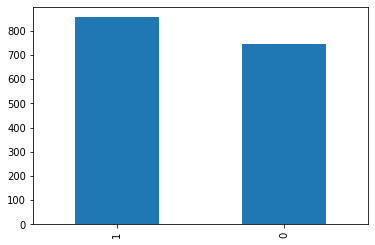

In [4]:
print(wine_data['quality'].value_counts())
wine_data['quality'].value_counts().plot(kind='bar')

## 3.1.2 data analysis(要跑很久，別隨便執行)
將資料視覺化後
可推論volatile acidity、total sulfur dioxide、sulphates及alcohol(1,6,9,10)為較重要的特徵
(0,2,3,4,5,7,8)為較不重要的特徵

In [ ]:
sns.pairplot(wine_data,hue="quality")

## 3.2 Split input and output


In [29]:
x = wine_data.iloc[:, :-1]
y = wine_data.iloc[:, -1]

print(f"Columns of input: {list(x.columns)}")
print(f"Columns of output: {y.name}")
print(f"Shape of input: {x.shape}")
print(f"Shape of output: {y.shape}")

Columns of input: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Columns of output: quality
Shape of input: (1599, 11)
Shape of output: (1599,)


## 3.2.2 only input important feature(暫時淘汰方案)
只取volatile acidity、total sulfur dioxide、sulphates及alcohol四個feature

In [ ]:
x1 = wine_data.iloc[:,[1,6,9,10]]
y1 = wine_data.iloc[:, -1]

print(f"Columns of input: {list(x.columns)}")
print(f"Columns of output: {y.name}")
print(f"Shape of input: {x.shape}")
print(f"Shape of output: {y.shape}")

## 3.2.3 add new feature by mix two original feature
以下指令合法
print(wine_data.iloc[:,[0]])
g = wine_data.iloc[:,[0]]*wine_data.iloc[:,[0]]
print(g)

In [30]:
a10 = wine_data
a100 = a10.to_numpy()

for i in range(11):
  for j in range(i+1,11):
    x.insert(11, "insert", (a100[:,i]**2+a100[:,j]**2)/4 , allow_duplicates=True)

In [ ]:
print(x)

## 3.3 Split train and test data

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1279, 66)
Shape of x_test: (320, 66)
Shape of y_train: (1279,)
Shape of y_test: (320,)


## 3.4 Normalize data

Simply using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
#廢棄方案：將特定資料先取平方
#平方後再正規化
#進model前和進入後資料型態不同
x_train.iloc[:,[0,2,3,4,5,7,8]] = x_train.iloc[:,[0,2,3,4,5,7,8]]**2
x_test.iloc[:,[0,2,3,4,5,7,8]] = x_test.iloc[:,[0,2,3,4,5,7,8]]**2

x_train.iloc[:,[1,6,9,10]] = x_train.iloc[:,[1,6,9,10]]**2
x_test.iloc[:,[1,6,9,10]] = x_test.iloc[:,[1,6,9,10]]**2

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#廢棄方案：將資料獨立賦予權重
weight = 1.0
x_train[:,[1,6,9,10]] = weight * x_train[:,[1,6,9,10]]**2
x_test[:,[1,6,9,10]] = weight * x_test[:,[1,6,9,10]]**2

# 4. Build model

In [33]:
# You can change the structure of the model here
del model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=(x_train.shape[1],), activation='elu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax')
])

# You can change the optimizer here (ref: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               8576      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 2)                 34        
                                                                 
Total params: 19,474
Trainable params: 19,474
Non-trainable params: 0
_________________________________________________________________


## 4.1. Setting callback function

In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# 5. Train model

In [35]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6627 - accuracy: 0.6075 - val_loss: 0.6212 - val_accuracy: 0.7063
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.6935 - val_loss: 0.5935 - val_accuracy: 0.7312
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.7232 - val_loss: 0.5736 - val_accuracy: 0.7281
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7381 - val_loss: 0.5580 - val_accuracy: 0.7437
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7428 - val_loss: 0.5454 - val_accuracy: 0.7531
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7404 - val_loss: 0.5358 - val_accuracy: 0.7531
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7404 - val_loss: 0.5284 - val_accuracy: 0.7563
Epoch 8/100


## 6. After training

In [36]:
model.save("redwine_model_2.h5")

## 6.1. Plot learning curve

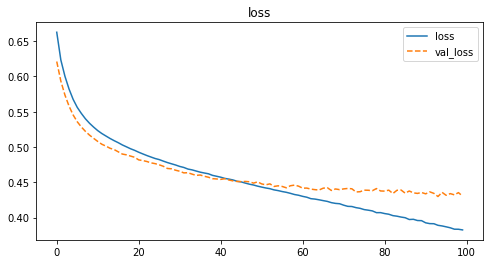

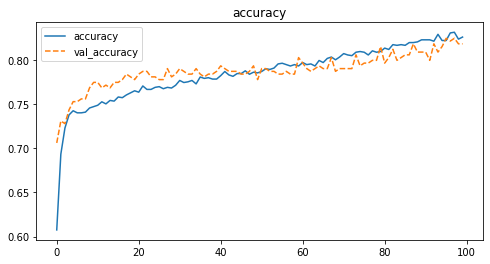

In [37]:
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

## 6.2. Evaluate model

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

10/10 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8188
Test Loss is 0.4304044842720032
Test Accuracy is 0.8187500238418579


## 6.3. Create classification report

In [39]:
predict = model.predict(x_test)

y_pred=[]
for i in range(len(predict)):
  y_pred.append(np.argmax(predict[i]))

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       148
           1       0.83      0.84      0.83       172

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



## 6.4. Show [confusion matrix](https://www.ycc.idv.tw/confusion-matrix.html)

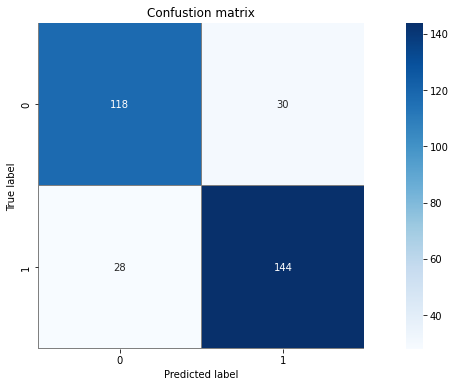

In [40]:
p_test = predict.argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, p_test)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey', fmt="d")
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 結論
使用了三種方法來來善原始的模型
1. 生成額外的特徵：將原始特徵兩兩取平方後，相加除以四。取平方目的是放大相同特徵之間的數值差異；除四是為了，如果不同特徵之間數值如果相近，相加後數值之間的差距會再加大。正常情況下會考慮兩特徵之間，A特徵較B特徵大，A特徵取平方後增加數值之間的差異，再加上B特徵的平方作為偏移值。
2. 將第一層relu改成elu：相較relu，elu的輸出較為平滑，較適合作為輸入層使用
3. 將layer的unit增大：因為特徵增加，將unit適度增加能確保新生成的特徵有有效的使用

另外也有廢棄方案
1. 分析數據後只取重要之特徵：特徵不夠，分類後的結果根用猜的機率差不多
2. 在正規化後給予特定特徵權重：可能適度調整權重會是可行方案，不過若是給予重要特徵1.5的權重，整個模型就會有過度擬合的情況
3. 將特定資料先取平方後再正規化：會過度擬合
4. 增加層數：會過度擬合
5. 過度地增加unit數：會過度擬合